## Obejctive

* Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).
* A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis.

In [1]:
import sqlite3
import time
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data from database

In [2]:
connection = sqlite3.connect("D:\\Data Science\\Projects\\Amazon food review\\database.sqlite")
df = pd.read_sql_query("Select * from  Reviews", connection)
print(df.shape)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# Since score of 3 is considered neutral hence removing it from the database table--

df = pd.read_sql_query("Select * From Reviews where Score!=3",connection)
df.shape

(525814, 10)

In [4]:
# Score (4,5) are considered + ive (1)
# Score (1,2) are considered - ive (0)

def score_manage(x):
    if x in [4,5]:
        return 1
    else:
        return 0

In [5]:
df.Score = df.Score.map(score_manage)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Data Cleaning

In [6]:
# for more visualtization sorting data according to the ProductID

sorted_df = df.sort_values(axis=0,by=['ProductId'] , na_position='last', kind='quicksort' )
sorted_df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...


In [7]:
# this df shows the DUplicate records are present in the table

sorted_df[sorted_df.duplicated(subset=['ProductId','UserId','Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
157843,171154,7310172001,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",0,0,1,1233360000,best dog treat-- great for training--- all do...,Freeze dried liver has a hypnotic effect on do...
157908,171223,7310172001,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",1,1,1,1233360000,best dog treat-- great for training--- all do...,Freeze dried liver has a hypnotic effect on do...
157876,171189,7310172001,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",39,51,1,1233360000,NO waste at all ---- great for training ----...,Freeze dried liver has a hypnotic effect on do...
200631,217420,7310172101,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",39,51,1,1233360000,NO waste at all ---- great for training ----...,Freeze dried liver has a hypnotic effect on do...
200596,217383,7310172101,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",0,0,1,1233360000,dogs LOVE it-- best treat for rewards and tra...,Freeze dried liver has a hypnotic effect on do...
200597,217384,7310172101,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",0,0,1,1233360000,best dog treat-- great for training--- all do...,Freeze dried liver has a hypnotic effect on do...
341818,369802,B000084DWM,A36JDIN9RAAIEC,Jon,2,2,1,1292976000,Don't fall prey to fads and anecdotal reviews,"I have two cats, one 6 and one 2 years old. Bo..."
341820,369804,B000084DWM,A3TVZM3ZIXG8YW,christopher hayes,33,48,0,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
341815,369799,B000084DWM,A25C5MVVCIYT5D,Natalie Dawn,2,2,1,1304726400,Nothing else works,I understand all the complaints about Science ...
341798,369781,B000084DWM,A3TVZM3ZIXG8YW,christopher hayes,19,21,0,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."


In [8]:
df = df.drop_duplicates(subset=['ProductId','UserId','Text'])
df.shape

(524587, 10)

In [9]:
# CHecking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524587 entries, 0 to 525813
Data columns (total 10 columns):
Id                        524587 non-null int64
ProductId                 524587 non-null object
UserId                    524587 non-null object
ProfileName               524587 non-null object
HelpfulnessNumerator      524587 non-null int64
HelpfulnessDenominator    524587 non-null int64
Score                     524587 non-null int64
Time                      524587 non-null int64
Summary                   524587 non-null object
Text                      524587 non-null object
dtypes: int64(5), object(5)
memory usage: 44.0+ MB


In [10]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [11]:
# Helpfulness numerator cant be greater then Helpfulness denominator

df[df.HelpfulnessNumerator > df.HelpfulnessDenominator]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
41159,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,1,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
59301,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,1,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [12]:
# ABove two rows to be deleted -

df = df[df.HelpfulnessNumerator <= df.HelpfulnessDenominator]
df.shape

(524585, 10)

In [13]:
# Checking the dataframe balancing

df.Score.value_counts()

1    442867
0     81718
Name: Score, dtype: int64

### Data Preprocessing

* Data Cleaning using Regex
* Convert all to lower case
* Stop word removal
* Stemming
* Lemmitization (regains the english meaning)


In [14]:
import time
from tqdm import tqdm # for graphical  view of progress bar
import re                      # for regular expression
from bs4 import BeautifulSoup  # for removing the xml tags

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [15]:
# Function for regex clean

def text_cleaning(sen):
    sen = sen.lower()  # coverting all words to lower case
    sen = BeautifulSoup(sen,'lxml').get_text()
    sen = re.sub(r'<.*?>'," ",sen)
    sen = re.sub("\S*\d\S*", "", sen).strip()
    sen = re.sub(r"won't", "will not", sen)
    sen = re.sub(r"can\'t", "can not", sen)
    sen = re.sub(r"n\'t", " not", sen)
    sen = re.sub(r"\'re", " are", sen)
    sen = re.sub(r"\'s", " is", sen)
    sen = re.sub(r"\'d", " would", sen)
    sen = re.sub(r"\'ll", " will", sen)
    sen = re.sub(r"\'t", " not", sen)
    sen = re.sub(r"\'ve", " have", sen)
    sen = re.sub(r"\'m", " am", sen)
    sen = re.sub(r"[^a-zA-Z0-9\n]"," ",sen) # to remoce any special character
    
    return sen



# importing stop words from NLTK---

stop_words = list(set(stopwords.words('english')))
check = ['no', 'nor', 'not']
for i in check:
    if i in stop_words:
        stop_words.remove(i)


        
# importing Stemming--
stemmer = SnowballStemmer('english')


# Importing Lemmatizer ---
lemmetizer = WordNetLemmatizer()

In [16]:
def processed_text(review):
    
    processed_review = []
    review = text_cleaning(review)
    
    for word in review.split():
        if word not in stop_words:
#             word = lemmetizer.lemmatize(word)
            processed_review.append(word)
            
    return  (" ".join(processed_review))  

In [25]:
a = time.clock()

processed_review = df.Text.apply(processed_text)

b = time.clock()
print(b-a,"secs")

593.3213766 secs


In [26]:
processed_review.shape

(524585,)

## Word Cloud

In [53]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
sampl = processed_review[0:5]
sampl

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts p...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [57]:


wc = WordCloud(background_color="white",stopwords=stopwords)
# generate word cloud
wc.generate("My name is haurya singh my name shaurya sahurya")
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: 'WordListCorpusReader' object is not iterable

## Text Featurization

1. BOW
2. Bi gram, N gram
3. TF-IDF
4. Word 2 vec

#### 1. BOW

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()
processed_review_bowvector = count_vector.fit_transform(processed_review)
processed_review_bowvector.shape

(524585, 119006)

In [32]:
count_vector.get_feature_names() # get_feature_names() gives all the unique words
print("Number of unoque words in corpus : ",len(count_vector.get_feature_names()))

Number of unoque words in corpus :  119006


In [45]:
(processed_review_bowvector[1].toarray() # vector corresponding the review 1

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]

In [47]:
count_vector.get_feature_names()[0:30]  # here all features were taken 

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaaaaaa',
 'aaaaaaaaaaaa',
 'aaaaaaaaaaaaa',
 'aaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaacccccccckkkkkk',
 'aaaaaaaaagghh',
 'aaaaaaah',
 'aaaaaaahhhhhh',
 'aaaaaaarrrrrggghhh',
 'aaaaaah',
 'aaaaaahhh',
 'aaaaaahhhh',
 'aaaaaahhhhh',
 'aaaaaahhhhhyaaaaaa',
 'aaaaaand',
 'aaaaaawwwwwwwwww',
 'aaaaah',
 'aaaaahhhhhhhhhhhhhhhh',
 'aaaaallll',
 'aaaaawsome',
 'aaaah',
 'aaaahhhhhh']

#### 2. Bi-gram and N-grasm


In [33]:
# ngram_range=(1,2) --> for the no of word in neighbour to take
# min_df=10  ----> min number of occurence of word compu;sory to be get noticed
# max_features =10000 ---> give top 10,000 fatures only out of all available


count_vector_2 = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=10000)
processed_review_bigrams = count_vector_2.fit_transform(processed_review)
processed_review_bigrams.shape

(524585, 10000)

In [37]:
count_vector_2.get_feature_names()[:30]    # only top 10,000  features were taekn

['ability',
 'able',
 'able buy',
 'able eat',
 'able find',
 'able get',
 'able make',
 'able order',
 'able purchase',
 'able use',
 'absolute',
 'absolute best',
 'absolute favorite',
 'absolutely',
 'absolutely best',
 'absolutely delicious',
 'absolutely love',
 'absolutely loved',
 'absolutely loves',
 'absolutely no',
 'absolutely wonderful',
 'absorb',
 'absorbed',
 'acai',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accident',
 'accidentally']

In [43]:
processed_review_bigrams[1].toarray() # vector corresponding the review 1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### 3. TF-IDF Vector

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vector = TfidfVectorizer(ngram_range=(1,2), min_df=10, max_features=10000)
processed_review_tfidf = tf_idf_vector.fit_transform(processed_review)
processed_review_tfidf.shape

(524585, 10000)

In [40]:
tf_idf_vector.get_feature_names()[:30]

['ability',
 'able',
 'able buy',
 'able eat',
 'able find',
 'able get',
 'able make',
 'able order',
 'able purchase',
 'able use',
 'absolute',
 'absolute best',
 'absolute favorite',
 'absolutely',
 'absolutely best',
 'absolutely delicious',
 'absolutely love',
 'absolutely loved',
 'absolutely loves',
 'absolutely no',
 'absolutely wonderful',
 'absorb',
 'absorbed',
 'acai',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accident',
 'accidentally']

In [42]:
processed_review_tfidf[1].toarray() # vector corresponding the review 1

array([[0., 0., 0., ..., 0., 0., 0.]])

#### 4. Word 2 Vec

It can be implemented by 2 ways
* By using google trained google news corpus
* By trainning own corpus

In [58]:
from gensim.models import word2vec

In [50]:
# min_count = 5 considers only words that occured atleast 5 times

# w2v_model = Word2Vec(processed_review, min_count=5, size=50, workers=4)

NameError: name 'Word2Vec' is not defined

In [ ]:
# unable to install it on windows 10

## Logistic Regression (Bi-Ngram)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import auc, confusion_matrix,log_loss, roc_auc_score

In [60]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [75]:
x ,x_bigram_test , y , y_bigram_test = train_test_split(processed_review_bigrams , df.Score, stratify =df.Score, random_state=0, test_size=0.20 )
x_bigram_train, x_bigram_cv, y_train, y_cv = train_test_split(x,y,stratify=y,random_state=0,test_size=0.20) 

In [85]:
alpha = [10**x for x in range(-5,2)]
auc_cv = []
log_loss_array = []

for i in alpha:
    clf = SGDClassifier(loss='log', penalty='l2',alpha=i,random_state=0)
    clf.fit(x_bigram_train, y_train)
    sigmoid_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sigmoid_clf.fit(x_bigram_train, y_train)
    predicted_y = sigmoid_clf.predict_proba(x_bigram_cv)
    loss = log_loss(y_cv, predicted_y,labels=clf.classes_)
    log_loss_array.append(loss)
    print("For alpha : ",i," Log loss = ",loss)
#     auc_cv.append(roc_auc_score(y_cv,predicted_y))

For alpha :  1e-05  Log loss =  0.1713843204634063
For alpha :  0.0001  Log loss =  0.15803087518531844
For alpha :  0.001  Log loss =  0.1874473702293829
For alpha :  0.01  Log loss =  0.2559888701195097
For alpha :  0.1  Log loss =  0.389877011007419
For alpha :  1  Log loss =  0.4325988679687597
For alpha :  10  Log loss =  0.43116893069107465


In [86]:
# log loss is min At alpha = 0.0001
# trainng model at best alpha

clf = SGDClassifier(loss='log', penalty='l2',alpha=0.0001,random_state=0)
clf.fit(x_bigram_train, y_train)
sigmoid_clf = CalibratedClassifierCV(clf, method='sigmoid')
sigmoid_clf.fit(x_bigram_train, y_train)
predicted_y = sigmoid_clf.predict_proba(x_bigram_test)
loss = log_loss(y_bigram_test, predicted_y,labels=clf.classes_)
print(" At alpha = 0.0001, For Test Data Log loss is : ",loss)

 At alpha = 0.0001, For Test Data Log loss is :  0.156188911103147


In [88]:
from prettytable import PrettyTable    
tbl = PrettyTable()
tbl.field_names = ["ML Model","Vectorizer","Regularization", "Hyperameter(alpha)", "Cv Log Loss",'Test log loss']
tbl.add_row(['Logistic Class.','Bi Gram','l2','0.0001','1.158','0.156'])

In [90]:
print(tbl)

+-----------------+------------+----------------+--------------------+-------------+---------------+
|     ML Model    | Vectorizer | Regularization | Hyperameter(alpha) | Cv Log Loss | Test log loss |
+-----------------+------------+----------------+--------------------+-------------+---------------+
| Logistic Class. |  Bi Gram   |       l2       |       0.0001       |    1.158    |     0.156     |
+-----------------+------------+----------------+--------------------+-------------+---------------+


## Logistic Regression (TF-IDF, with L2)

In [188]:
x ,x_tfidf_test , y , y_tfidf_test = train_test_split(processed_review_tfidf , df.Score, stratify =df.Score, random_state=0, test_size=0.20 )
x_tfidf_train, x_tfidf_cv, y_train, y_cv = train_test_split(x,y,stratify=y,random_state=0,test_size=0.20) 

In [93]:
alpha = [10**x for x in range(-5,2)]
log_loss_array = []

for i in alpha:
    clf = SGDClassifier(loss='log', penalty='l2',alpha=i,random_state=0)
    clf.fit(x_tfidf_train, y_train)
    sigmoid_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sigmoid_clf.fit(x_tfidf_train, y_train)
    predicted_y = sigmoid_clf.predict_proba(x_tfidf_cv)
    loss = log_loss(y_cv, predicted_y,labels=clf.classes_)
    log_loss_array.append(loss)
    print("For alpha : ",i," Log loss = ",loss)

For alpha :  1e-05  Log loss =  0.15062224672769398
For alpha :  0.0001  Log loss =  0.18834416566953543
For alpha :  0.001  Log loss =  0.23546356816048053
For alpha :  0.01  Log loss =  0.27559481342936687
For alpha :  0.1  Log loss =  0.4160471346161671
For alpha :  1  Log loss =  0.4238655594400876
For alpha :  10  Log loss =  0.42454152072136825


In [94]:
# log loss is min At alpha = 0.00001
# trainng model at best alpha

clf = SGDClassifier(loss='log', penalty='l2',alpha=0.00001,random_state=0)
clf.fit(x_tfidf_train, y_train)
sigmoid_clf = CalibratedClassifierCV(clf, method='sigmoid')
sigmoid_clf.fit(x_tfidf_train, y_train)
predicted_y = sigmoid_clf.predict_proba(x_tfidf_test)
loss = log_loss(y_tfidf_test, predicted_y,labels=clf.classes_)
print(" At alpha = 0.00001, For Test Data Log loss is : ",loss)

 At alpha = 0.00001, For Test Data Log loss is :  0.14865336110185484


In [105]:
print(tbl)

+-----------------+------------+----------------+--------------------+-------------+---------------+
|     ML Model    | Vectorizer | Regularization | Hyperameter(alpha) | Cv Log Loss | Test log loss |
+-----------------+------------+----------------+--------------------+-------------+---------------+
| Logistic Class. |   TF-IDF   |       l2       |       0.0001       |    0.150    |     0.148     |
| Logistic Class. |  Bi Gram   |       l2       |       0.0001       |    0.158    |     0.156     |
+-----------------+------------+----------------+--------------------+-------------+---------------+


## Logistic Regression (BOW)

In [106]:
x ,x_bow_test , y , y_bow_test = train_test_split(processed_review_bowvector , df.Score, stratify =df.Score, random_state=0, test_size=0.20 )
x_bow_train, x_bow_cv, y_train, y_cv = train_test_split(x,y,stratify=y,random_state=0,test_size=0.20) 

In [107]:
alpha = [10**x for x in range(-5,2)]
log_loss_array = []

for i in alpha:
    clf = SGDClassifier(loss='log', penalty='l2',alpha=i,random_state=0)
    clf.fit(x_bow_train, y_train)
    sigmoid_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sigmoid_clf.fit(x_bow_train, y_train)
    predicted_y = sigmoid_clf.predict_proba(x_bow_cv)
    loss = log_loss(y_cv, predicted_y,labels=clf.classes_)
    log_loss_array.append(loss)
    print("For alpha : ",i," Log loss = ",loss)

For alpha :  1e-05  Log loss =  0.18976661954055318
For alpha :  0.0001  Log loss =  0.18036185983962616
For alpha :  0.001  Log loss =  0.2056061930639523
For alpha :  0.01  Log loss =  0.2665360184991525
For alpha :  0.1  Log loss =  0.39383617053238773
For alpha :  1  Log loss =  0.4325819688580151
For alpha :  10  Log loss =  0.43109077725845746


In [123]:
# log loss is min At alpha = 0.0001
# trainng model at best alpha

clf = SGDClassifier(loss='log', penalty='l2',alpha=0.0001,random_state=0)
clf.fit(x_bow_train, y_train)
sigmoid_clf = CalibratedClassifierCV(clf, method='sigmoid')
sigmoid_clf.fit(x_bow_train, y_train)
predicted_y = sigmoid_clf.predict_proba(x_bow_test)
loss = log_loss(y_bow_test, predicted_y,labels=clf.classes_)
print(" At alpha = 0.00001, For Test Data Log loss is : ",loss)

 At alpha = 0.00001, For Test Data Log loss is :  0.17968136206410937


In [136]:
weight = clf.coef_
np.count_nonzero(weight)  # 'L1' regularizatio produces saprse matrix

97104

In [111]:
tbl.add_row(['Logistic Class.','BOW','l2','0.0001','0.180','0.179'])

In [112]:
print(tbl)

+-----------------+------------+----------------+--------------------+-------------+---------------+
|     ML Model    | Vectorizer | Regularization | Hyperameter(alpha) | Cv Log Loss | Test log loss |
+-----------------+------------+----------------+--------------------+-------------+---------------+
| Logistic Class. |   TF-IDF   |       l2       |       0.0001       |    0.150    |     0.148     |
| Logistic Class. |  Bi Gram   |       l2       |       0.0001       |    0.158    |     0.156     |
| Logistic Class. |    BOW     |       l2       |       0.0001       |    0.180    |     0.179     |
+-----------------+------------+----------------+--------------------+-------------+---------------+


## Logistic Regression (TF-IDF, with L1)

In [113]:
alpha = [10**x for x in range(-5,2)]
log_loss_array = []

for i in alpha:
    clf = SGDClassifier(loss='log', penalty='l1',alpha=i,random_state=0)
    clf.fit(x_tfidf_train, y_train)
    sigmoid_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sigmoid_clf.fit(x_tfidf_train, y_train)
    predicted_y = sigmoid_clf.predict_proba(x_tfidf_cv)
    loss = log_loss(y_cv, predicted_y,labels=clf.classes_)
    log_loss_array.append(loss)
    print("For alpha : ",i," Log loss = ",loss)

For alpha :  1e-05  Log loss =  0.15568907055150208
For alpha :  0.0001  Log loss =  0.22288634676872407
For alpha :  0.001  Log loss =  0.3784774308292144
For alpha :  0.01  Log loss =  0.432600624819805
For alpha :  0.1  Log loss =  0.4326006248198049
For alpha :  1  Log loss =  0.43260062481980505
For alpha :  10  Log loss =  0.4326006248198049


In [114]:
# log loss is min At alpha = 0.00001
# trainng model at best alpha

clf = SGDClassifier(loss='log', penalty='l2',alpha=0.00001,random_state=0)
clf.fit(x_tfidf_train, y_train)
sigmoid_clf = CalibratedClassifierCV(clf, method='sigmoid')
sigmoid_clf.fit(x_tfidf_train, y_train)
predicted_y = sigmoid_clf.predict_proba(x_tfidf_test)
loss = log_loss(y_tfidf_test, predicted_y,labels=clf.classes_)
print(" At alpha = 0.00001, For Test Data Log loss is : ",loss)

 At alpha = 0.00001, For Test Data Log loss is :  0.14865336110185484


In [115]:
tbl.add_row(['Logistic Class.','TF-IDF','l1','0.00001','0.156','0.148'])
print(tbl)

+-----------------+------------+----------------+--------------------+-------------+---------------+
|     ML Model    | Vectorizer | Regularization | Hyperameter(alpha) | Cv Log Loss | Test log loss |
+-----------------+------------+----------------+--------------------+-------------+---------------+
| Logistic Class. |   TF-IDF   |       l2       |       0.0001       |    0.150    |     0.148     |
| Logistic Class. |  Bi Gram   |       l2       |       0.0001       |    0.158    |     0.156     |
| Logistic Class. |    BOW     |       l2       |       0.0001       |    0.180    |     0.179     |
| Logistic Class. |   TF-IDF   |       l1       |      0.00001       |    0.156    |     0.148     |
+-----------------+------------+----------------+--------------------+-------------+---------------+


## Logistic Regression (Bi-Ngram, L1)

In [116]:
alpha = [10**x for x in range(-5,2)]
auc_cv = []
log_loss_array = []

for i in alpha:
    clf = SGDClassifier(loss='log', penalty='l1',alpha=i,random_state=0)
    clf.fit(x_bigram_train, y_train)
    sigmoid_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sigmoid_clf.fit(x_bigram_train, y_train)
    predicted_y = sigmoid_clf.predict_proba(x_bigram_cv)
    loss = log_loss(y_cv, predicted_y,labels=clf.classes_)
    log_loss_array.append(loss)
    print("For alpha : ",i," Log loss = ",loss)
#     auc_cv.append(roc_auc_score(y_cv,predicted_y))

For alpha :  1e-05  Log loss =  0.16958512944837217
For alpha :  0.0001  Log loss =  0.19452603275162178
For alpha :  0.001  Log loss =  0.25556242818702735
For alpha :  0.01  Log loss =  0.3884248816500186
For alpha :  0.1  Log loss =  0.4212649871906855
For alpha :  1  Log loss =  0.43260062481980505
For alpha :  10  Log loss =  0.4326006248198049


In [154]:
# log loss is min At alpha = 0.00001
# trainng model at best alpha

clf = SGDClassifier(loss='log', penalty='l1',alpha=0.00001,random_state=0)
clf.fit(x_bigram_train, y_train)
sigmoid_clf = CalibratedClassifierCV(clf, method='sigmoid')
sigmoid_clf.fit(x_bigram_train, y_train)
predicted_y = sigmoid_clf.predict(x_bigram_test)
loss = log_loss(y_bigram_test, predicted_y,labels=clf.classes_)
print(" At alpha = 0.0001, For Test Data Log loss is : ",loss)

 At alpha = 0.0001, For Test Data Log loss is :  2.2231345583115054


In [122]:
weight = clf.coef_
np.count_nonzero(weight) # 'L1' regularizatio produces dense matrix

7461

In [118]:
tbl.add_row(['Logistic Class.','Bi-Gram','l1','0.00001','0.170','0.169'])
print(tbl)

+-----------------+------------+----------------+--------------------+-------------+---------------+
|     ML Model    | Vectorizer | Regularization | Hyperameter(alpha) | Cv Log Loss | Test log loss |
+-----------------+------------+----------------+--------------------+-------------+---------------+
| Logistic Class. |   TF-IDF   |       l2       |       0.0001       |    0.150    |     0.148     |
| Logistic Class. |  Bi Gram   |       l2       |       0.0001       |    0.158    |     0.156     |
| Logistic Class. |    BOW     |       l2       |       0.0001       |    0.180    |     0.179     |
| Logistic Class. |   TF-IDF   |       l1       |      0.00001       |    0.156    |     0.148     |
| Logistic Class. |  Bi-Gram   |       l1       |      0.00001       |    0.170    |     0.169     |
+-----------------+------------+----------------+--------------------+-------------+---------------+


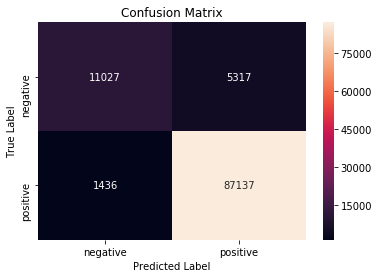

In [167]:
from sklearn.metrics import confusion_matrix

con = confusion_matrix(y_bigram_test, predicted_y)

class_label = ["negative", "positive"]
df_plot = pd.DataFrame(con, index = class_label, columns = class_label)
sns.heatmap(df_plot, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [168]:
df_plot

,negative,positive
negative,11027,5317
positive,1436,87137


In [169]:
con

array([[11027,  5317],
       [ 1436, 87137]], dtype=int64)

## Feature Engineering

In [175]:
# Adding the lenth of string at the end of each review

In [185]:
processed_review = processed_review.map(lambda x: x + " "+str(len(x)))

In [186]:
print(tbl)

+-----------------+------------+----------------+--------------------+-------------+---------------+
|     ML Model    | Vectorizer | Regularization | Hyperameter(alpha) | Cv Log Loss | Test log loss |
+-----------------+------------+----------------+--------------------+-------------+---------------+
| Logistic Class. |   TF-IDF   |       l2       |       0.0001       |    0.150    |     0.148     |
| Logistic Class. |  Bi Gram   |       l2       |       0.0001       |    0.158    |     0.156     |
| Logistic Class. |    BOW     |       l2       |       0.0001       |    0.180    |     0.179     |
| Logistic Class. |   TF-IDF   |       l1       |      0.00001       |    0.156    |     0.148     |
| Logistic Class. |  Bi-Gram   |       l1       |      0.00001       |    0.170    |     0.169     |
+-----------------+------------+----------------+--------------------+-------------+---------------+


In [187]:
# Trainng model with feature engg on Top model

In [189]:
alpha = [10**x for x in range(-5,2)]
log_loss_array = []

for i in alpha:
    clf = SGDClassifier(loss='log', penalty='l2',alpha=i,random_state=0)
    clf.fit(x_tfidf_train, y_train)
    sigmoid_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sigmoid_clf.fit(x_tfidf_train, y_train)
    predicted_y = sigmoid_clf.predict_proba(x_tfidf_cv)
    loss = log_loss(y_cv, predicted_y,labels=clf.classes_)
    log_loss_array.append(loss)
    print("For alpha : ",i," Log loss = ",loss)

For alpha :  1e-05  Log loss =  0.15062224672769398
For alpha :  0.0001  Log loss =  0.18834416566953543
For alpha :  0.001  Log loss =  0.23546356816048053
For alpha :  0.01  Log loss =  0.27559481342936687
For alpha :  0.1  Log loss =  0.4160471346161671
For alpha :  1  Log loss =  0.4238655594400876
For alpha :  10  Log loss =  0.42454152072136825


In [190]:
# log loss is min At alpha = 0.00001
# trainng model at best alpha

clf = SGDClassifier(loss='log', penalty='l2',alpha=0.00001,random_state=0)
clf.fit(x_tfidf_train, y_train)
sigmoid_clf = CalibratedClassifierCV(clf, method='sigmoid')
sigmoid_clf.fit(x_tfidf_train, y_train)
predicted_y = sigmoid_clf.predict_proba(x_tfidf_test)
loss = log_loss(y_tfidf_test, predicted_y,labels=clf.classes_)
print(" At alpha = 0.00001, For Test Data Log loss is : ",loss)

 At alpha = 0.00001, For Test Data Log loss is :  0.14865336110185484


In [192]:
clf = SGDClassifier(loss='log', penalty='l2',alpha=0.00001,random_state=0)
clf.fit(x_tfidf_train, y_train)
predicted_y = clf.predict(x_tfidf_test)

In [194]:
con = confusion_matrix(y_tfidf_test, predicted_y)
con

array([[11207,  5137],
       [ 1399, 87174]], dtype=int64)

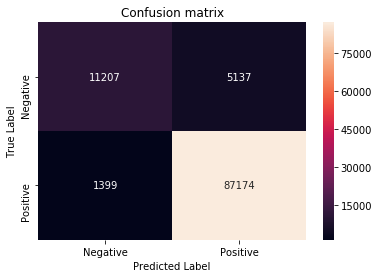

In [199]:
df_plot = pd.DataFrame(data =con ,index = class_label ,columns = class_label)
class_label = ["Negative","Positive"]
sns.heatmap(df_plot,annot = True,fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

### Getting top 10 features from Model trained

In [207]:
#  tf_idf_vector --- this contains all the features
tf_all_features = tf_idf_vector.get_feature_names()
len(tf_all_features)

10000

In [209]:
# Weighted hy[erplane vector 'weight vector'
weight_vector = clf.coef_
weight_vector.shape

(1, 10000)

In [225]:
pos_a = np.argsort(weight_vector)[:,::-1]
pos_a.shape

(1, 10000)

In [223]:
neg_a = np.argsort(weight_vector)
neg_a.shape

(1, 10000)

In [227]:
# top +ive words --
for i in range(0,10):
    print(tf_all_features[pos_a[0][i]])

great
delicious
best
perfect
good
loves
not disappointed
love
excellent
wonderful


In [228]:
# top negative words ---
for i in range(0,10):
    print(tf_all_features[neg_a[0][i]])

disappointed
worst
disappointing
not worth
not good
not recommend
terrible
awful
not
not buy


In [229]:
print(tbl)

+-----------------+------------+----------------+--------------------+-------------+---------------+
|     ML Model    | Vectorizer | Regularization | Hyperameter(alpha) | Cv Log Loss | Test log loss |
+-----------------+------------+----------------+--------------------+-------------+---------------+
| Logistic Class. |   TF-IDF   |       l2       |       0.0001       |    0.150    |     0.148     |
| Logistic Class. |  Bi Gram   |       l2       |       0.0001       |    0.158    |     0.156     |
| Logistic Class. |    BOW     |       l2       |       0.0001       |    0.180    |     0.179     |
| Logistic Class. |   TF-IDF   |       l1       |      0.00001       |    0.156    |     0.148     |
| Logistic Class. |  Bi-Gram   |       l1       |      0.00001       |    0.170    |     0.169     |
+-----------------+------------+----------------+--------------------+-------------+---------------+


## Linear SVM (Bi-gram)

In [230]:
alpha = [10**x for x in range(-5,2)]
log_loss_array = []

for i in alpha:
    clf = SGDClassifier(loss='hinge', penalty='l2',alpha=i,random_state=0)
    clf.fit(x_bigram_train, y_train)
    sigmoid_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sigmoid_clf.fit(x_bigram_train, y_train)
    predicted_y = sigmoid_clf.predict_proba(x_bigram_cv)
    loss = log_loss(y_cv, predicted_y,labels=clf.classes_)
    log_loss_array.append(loss)
    print("For alpha : ",i," Log loss = ",loss)

For alpha :  1e-05  Log loss =  0.17147212128724118
For alpha :  0.0001  Log loss =  0.1572332708355313
For alpha :  0.001  Log loss =  0.16991852334223542
For alpha :  0.01  Log loss =  0.20454672270750435
For alpha :  0.1  Log loss =  0.36261523663011647
For alpha :  1  Log loss =  0.43247861984180797
For alpha :  10  Log loss =  0.43094396826788645


In [231]:
# log loss is min At alpha = 0.0001
# trainng model at best alpha

clf = SGDClassifier(loss='hinge', penalty='l2',alpha=0.0001,random_state=0)
clf.fit(x_bigram_train, y_train)
sigmoid_clf = CalibratedClassifierCV(clf, method='sigmoid')
sigmoid_clf.fit(x_bigram_train, y_train)
predicted_y = sigmoid_clf.predict(x_bigram_test)
loss = log_loss(y_bigram_test, predicted_y,labels=clf.classes_)
print(" At alpha = 0.0001, For Test Data Log loss is : ",loss)

 At alpha = 0.0001, For Test Data Log loss is :  1.9765559262138674


In [232]:
tbl.add_row(['Linear SVM.','Bi-Gram','l2','0.0001','0.157','1.97'])
print(tbl)

+-----------------+------------+----------------+--------------------+-------------+---------------+
|     ML Model    | Vectorizer | Regularization | Hyperameter(alpha) | Cv Log Loss | Test log loss |
+-----------------+------------+----------------+--------------------+-------------+---------------+
| Logistic Class. |   TF-IDF   |       l2       |       0.0001       |    0.150    |     0.148     |
| Logistic Class. |  Bi Gram   |       l2       |       0.0001       |    0.158    |     0.156     |
| Logistic Class. |    BOW     |       l2       |       0.0001       |    0.180    |     0.179     |
| Logistic Class. |   TF-IDF   |       l1       |      0.00001       |    0.156    |     0.148     |
| Logistic Class. |  Bi-Gram   |       l1       |      0.00001       |    0.170    |     0.169     |
|   Linear SVM.   |  Bi-Gram   |       l2       |       0.0001       |    0.157    |      1.97     |
+-----------------+------------+----------------+--------------------+-------------+-------

* For linear SVM despite of Hyperparameter trainning We see marginal difference with the cv_log loss and Test log loss
* Thus model has High Variance
* Model is useless as hypertunning is done

## Conclusion

In [235]:
print(tbl[0])

+-----------------+------------+----------------+--------------------+-------------+---------------+
|     ML Model    | Vectorizer | Regularization | Hyperameter(alpha) | Cv Log Loss | Test log loss |
+-----------------+------------+----------------+--------------------+-------------+---------------+
| Logistic Class. |   TF-IDF   |       l2       |       0.0001       |    0.150    |     0.148     |
+-----------------+------------+----------------+--------------------+-------------+---------------+


Logistic Regression best with the above Hyperparameters